<a href="https://colab.research.google.com/github/Sharon-Faith/football_match_ip/blob/main/match_analysis_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Match analysis

## Introduction

### a) Specifying the Question

The main objective of the analysis is to develop models that will predict the results of a football game between team 1 and team 2, based on who is home and who is away, and on the type of tournament (friendly, world cup or other). Mchezopesa Ltd will utilise the results of this analysis.

### b) Defining the Metric for Success

Developing models that will be  able to predict: 

*   How many goals the home team scores.
*   How many goals the away team scores.
*   Whether the game is a win, loss or draw from the home team's perspective.



### c) Understanding the context 

Football is one of the most popular sports in the world. One of the factors that may influence the outcome of a football game is rank. The men's FIFA World Ranking calculation has varied over the years in terms of the metrics and weights used in the calculations, but overally, the most successful men's national teams are ranked highest. There are also different types of tournaments, and friendly tournaments are those that have a minimal or non-existent effect on a team's rankings. Predictions of the results of major matches are a point of interest for numerous parties in the world of football.

### d) Recording the Experimental Design



*   Determine the main objectives
*   Load and preview the dataset.
*   Understand the data.
*   Prepare the dataset - Identify outliers, anomalies, duplicates, missing values, and determine how deal with them, drop unnecessary columns, perform relevant datatype conversion, generate necessary new columns, merge datasets.
*    Analyse the dataset using univariate, bivariate and multivariate analysis techniques.
*   Implement the solution through modelling.
*   Challenge the solution.
*   Conclusion



### e) Data Relevance

The datasets provided ([here](https://drive.google.com/open?id=1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc)) are relevant to the research question. Combined, they contain information on scores from numerous matches, as well as rankings of different country teams. This is the information needed to develop the models in question. 

## Reading the Data

In [197]:
#importing libraries that will be used
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
import scipy as sp
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
#loading the datasets

In [198]:
df_rank = pd.read_csv('fifa_ranking.csv')

In [199]:
df_res = pd.read_csv('results.csv')


## Checking the Data

In [ ]:
# Determining the no. of records in the datasets
#
print(df_rank.shape)
print('****************')
print(df_res.shape)

(57793, 16)
****************
(40839, 9)


In [ ]:
# Previewing the top of the datasets
df_rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
df_res.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
# Previewing the bottom of the datasets
df_rank.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [ ]:
df_res.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [ ]:
# Checking datatypes and other column info

df_rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [ ]:
df_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


## Tidying the Dataset

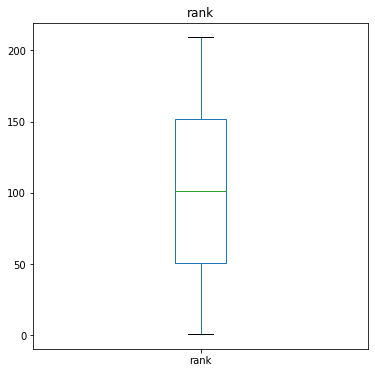

****************************************************


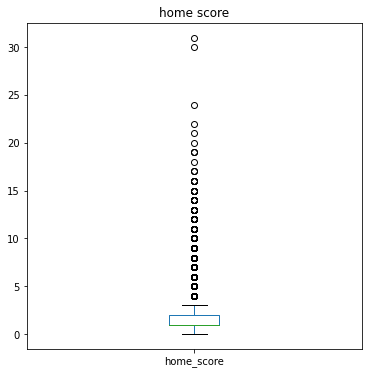

****************************************************


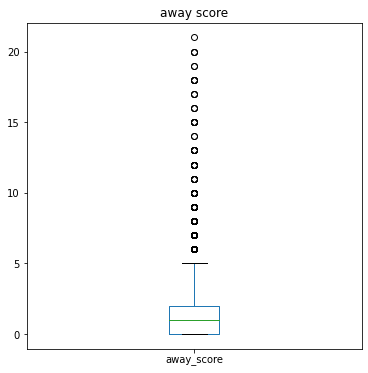

****************************************************


In [ ]:
# Checking for Outliers
#
#main columns of interest: home team score, away team score, tournament type, rank, date columns, home team, away team
#numerical columns of interest- home team score, away team score, rank
cols = ['rank', 'home_score', 'away_score',]
def title(col):
  if '_' in col:
    return col.replace('_', ' ')
  else:
    return col
for col in cols:
  if col == 'rank':
    df_rank.boxplot(col, grid=False)
  else:
    df_res.boxplot(col, grid=False)
  plt.title(title(col))
  plt.gcf().set_size_inches(6,6)
  plt.show()
  print('****************************************************')

There were outliers observed in home and away scores, but we will not drop the outliers. It was verified that on occasion home or away teams beat their opponents with scores as high as 30 - 0, etc. Therefore the high values are not erroneous.

In [ ]:
#verified these match results to be accurate
df_res[df_res['home_score'] > 29]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
7893,1971-09-13,Tahiti,Cook Islands,30,0,South Pacific Games,Papeete,French Polynesia,False
23781,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False


In [ ]:
#checking the number of unique dates in the rank dataset to have an overview of how many times
#the ranks were updated
print(df_rank['rank_date'].nunique())

286


In [ ]:
#seeing the number of unique entries in categorical columns of interest in the scores dataset
cols = ['tournament', 'home_team', 'away_team', 'date']
for col in cols:
  print(f'{col} column unique values: \n')
  print(df_res[col].nunique(), end='\n')
  print('**********')
  print('\n')

tournament column unique values: 

109
**********


home_team column unique values: 

309
**********


away_team column unique values: 

306
**********


date column unique values: 

15115
**********




In [ ]:
# Identifying the Missing Data
#
df_rank.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [ ]:
df_res.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [ ]:
# Checking for duplicates
#
df_res.duplicated().any()

False

In [ ]:
df_rank.duplicated().sum()

37

In [ ]:

df_rank[df_rank.duplicated()]
#Sudan's entries appear to have been duplicated

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
41320,113,Sudan,SDN,297.13,304,-1,126.55,126.55,219.72,109.86,67.36,20.21,202.53,40.51,CAF,2011-12-21
41536,120,Sudan,SDN,264.81,297,-7,129.14,129.14,163.12,81.56,40.91,12.27,209.21,41.84,CAF,2012-01-18
41736,111,Sudan,SDN,301.67,265,9,156.34,156.34,163.12,81.56,40.91,12.27,257.48,51.50,CAF,2012-02-15
41944,110,Sudan,SDN,299.75,302,1,156.34,156.34,163.12,81.56,46.75,14.03,239.09,47.82,CAF,2012-03-07
42157,113,Sudan,SDN,292.03,300,-3,149.12,149.12,180.83,90.42,0.00,0.00,262.47,52.49,CAF,2012-04-11
42366,113,Sudan,SDN,292.03,292,0,149.12,149.12,180.83,90.42,0.00,0.00,262.47,52.49,CAF,2012-05-09
42562,101,Sudan,SDN,338.25,292,12,179.70,179.70,209.32,104.66,7.08,2.12,258.83,51.77,CAF,2012-06-06
42775,105,Sudan,SDN,329.36,338,-4,171.57,171.57,229.19,114.60,8.50,2.55,203.22,40.64,CAF,2012-07-04
42983,104,Sudan,SDN,329.36,329,1,171.57,171.57,229.19,114.60,8.50,2.55,203.22,40.64,CAF,2012-08-08
43193,103,Sudan,SDN,331.79,329,1,169.05,169.05,187.77,93.88,108.13,32.44,182.11,36.42,CAF,2012-09-05


In [ ]:
#Further examining Sudan's duplicated entries
df_rank[(df_rank['rank'] == 113) & (df_rank['country_abrv'] == 'SDN') & (df_rank['rank_date'] == '2011-12-21')]

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
41319,113,Sudan,SDN,297.13,304,-1,126.55,126.55,219.72,109.86,67.36,20.21,202.53,40.51,CAF,2011-12-21
41320,113,Sudan,SDN,297.13,304,-1,126.55,126.55,219.72,109.86,67.36,20.21,202.53,40.51,CAF,2011-12-21


In [ ]:
#dropping the duplicates because as shown above various records Sudan seems to have been input twice
df_rank.drop_duplicates(inplace=True)

In [ ]:
#verifying duplicates were dropped
df_rank.duplicated().sum()

0

In [ ]:
#converting date columns in the dataset to datetime format 
df_rank['rank_date'] = pd.to_datetime(df_rank['rank_date'])
df_res['date'] = pd.to_datetime(df_res['date'])

In [201]:
#rankings appear to update monthly. compare with date of match
df_rank[df_rank['country_full'] == 'Germany'][['rank', 'rank_date']]

,rank,rank_date
0,1,1993-08-08
172,5,1993-09-23
337,4,1993-10-22
503,3,1993-11-19
669,1,1993-12-23
...,...,...
56738,1,2018-02-15
56949,1,2018-03-15
57160,1,2018-04-12
57371,1,2018-05-17


In [ ]:
#creating a function for new column with the year and month
#this will help in relating the month and year of a ranking 
#(which are more static and show a monthly update trend) in the ranking dataset to the corresponding part
#of the date of a game in the scores dataset, which is the first step (more info added later) 
# in matching home and away teams to their proper rankings for the particular time of their match.
def year_month(x):
  return f'{x.year}-{x.month}'

In [ ]:
#creating the year_month columns explained above
df_rank['year_month'] = df_rank['rank_date'].apply(lambda x: year_month(x))
df_res['year_month'] = df_res['date'].apply(lambda x: year_month(x))

In [ ]:
#previewing
print(df_rank.head(2))
print(df_res.head(2))

   rank country_full country_abrv  total_points  previous_points  rank_change  \
0     1      Germany          GER           0.0               57            0   
1     2        Italy          ITA           0.0               57            0   

   cur_year_avg  cur_year_avg_weighted  last_year_avg  last_year_avg_weighted  \
0           0.0                    0.0            0.0                     0.0   
1           0.0                    0.0            0.0                     0.0   

   two_year_ago_avg  two_year_ago_weighted  three_year_ago_avg  \
0               0.0                    0.0                 0.0   
1               0.0                    0.0                 0.0   

   three_year_ago_weighted confederation  rank_date year_month  
0                      0.0          UEFA 1993-08-08     1993-8  
1                      0.0          UEFA 1993-08-08     1993-8  
        date home_team away_team  home_score  away_score tournament     city  \
0 1872-11-30  Scotland   England      

In [ ]:
#seeing earliest date in rank dataset
df_rank['rank_date'].min()

Timestamp('1993-08-08 00:00:00')

In [ ]:
#seeing latest date in rank dataset
df_rank['rank_date'].max()

Timestamp('2018-06-07 00:00:00')

In [ ]:
#seeing earliest date in scores dataset
df_res['date'].min()

Timestamp('1872-11-30 00:00:00')

In [ ]:
#seeing latest date in scores dataset
df_res['date'].max()

Timestamp('2019-07-20 00:00:00')

In [ ]:
#scores dataset has to be filtered to dates available in rank because rank will be used in modelling

In [ ]:
##rank is only available from 1993 August to june 2018, and it will be used for modelling so 
#filter out matches from results dataframe not in that date range

df_res2 = df_res[(df_res['date'] >= df_rank['rank_date'].min()) & (df_res['date'] <= df_rank['rank_date'].max())].copy()

In [ ]:
df_res2

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year_month
17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1993-8
17916,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,1993-8
17917,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,1993-8
17918,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,1993-8
17919,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993-8
...,...,...,...,...,...,...,...,...,...,...
39829,2018-06-07,Abkhazia,United Koreans in Japan,2,0,CONIFA World Football Cup,Bromley,England,True,2018-6
39830,2018-06-07,Barawa,Panjab,0,5,CONIFA World Football Cup,Sutton,England,False,2018-6
39831,2018-06-07,Cascadia,Western Armenia,4,0,CONIFA World Football Cup,Bromley,England,True,2018-6
39832,2018-06-07,Northern Cyprus,Padania,3,2,CONIFA World Football Cup,Carshalton,England,True,2018-6


In [ ]:
df_res2.shape

(21919, 10)

In [ ]:
df_rank.shape

(57756, 17)

In [ ]:
#drop unnecessary columns for analysis from scores dataframe
df_res2.drop(columns=['city', 'country', 'neutral'], inplace=True)

In [ ]:
df_rank.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date', 'year_month'],
      dtype='object')

In [ ]:
#drop unnecessary columns for analysis from rank info dataframe
df_rank.drop(columns=['country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation'], inplace=True)

In [ ]:
#previewing
df_rank.head(1)

,rank,country_full,rank_date,year_month
0,1,Germany,1993-08-08,1993-8


In [ ]:
df_res2.head(1)

,date,home_team,away_team,home_score,away_score,tournament,year_month
17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,1993-8


In [ ]:
#resetting index to start from 0
df_res2 = df_res2.reset_index().drop('index', axis=1)
df_res2

,date,home_team,away_team,home_score,away_score,tournament,year_month
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,1993-8
1,1993-08-08,Brazil,Mexico,1,1,Friendly,1993-8
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,1993-8
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,1993-8
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,1993-8
...,...,...,...,...,...,...,...
21914,2018-06-07,Abkhazia,United Koreans in Japan,2,0,CONIFA World Football Cup,2018-6
21915,2018-06-07,Barawa,Panjab,0,5,CONIFA World Football Cup,2018-6
21916,2018-06-07,Cascadia,Western Armenia,4,0,CONIFA World Football Cup,2018-6
21917,2018-06-07,Northern Cyprus,Padania,3,2,CONIFA World Football Cup,2018-6


In [ ]:
# combine home team and year_month  to create column specifying home
#team and year_month of the game in scores dataset
df_res2['year_month_home'] = df_res2.apply(lambda x: x['home_team'] + ' ' + x['year_month'], axis=1)

In [ ]:
# combine country and year_month in ranking dataset to enable column specifying country
#and year_month of the ranking (which periodically update, on a ~monthly basis, hence focus on year month)
df_rank['year_month_home'] = df_rank.apply(lambda x: x['country_full'] + ' ' + x['year_month'], axis=1)

In [ ]:
#check duplicates in column that will be used for merging onto scores dataset 
df_rank.duplicated(subset=['year_month_home']).sum()

209

In [ ]:
#drop duplicates in column that will be used for merging. Many records, > 55000 left for analysis
df_rank.drop_duplicates(subset=['year_month_home'], inplace=True)

In [ ]:
df_res2.shape

(21919, 8)

In [ ]:
df_rank.shape

(57547, 5)

In [ ]:
#using left join on scores dataset on year_month_home. rank associated with each record at this point
#is of the country that matches the home team, at the particular year and month
df_merged_home = df_res2.merge(df_rank, on='year_month_home', how='left')

In [ ]:
df_merged_home.shape

(21919, 12)

In [ ]:
df_merged_home.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'year_month_x', 'year_month_home', 'rank', 'country_full',
       'rank_date', 'year_month_y'],
      dtype='object')

In [ ]:
#renaming rank column to specify it is the home rank that  has been merged
df_merged_home.rename(columns = {'rank': 'home_rank'}, inplace=True)

In [ ]:
df_merged_home.head(2)

,date,home_team,away_team,home_score,away_score,tournament,year_month_x,year_month_home,home_rank,country_full,rank_date,year_month_y
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,1993-8,Bolivia 1993-8,59.0,Bolivia,1993-08-08,1993-8
1,1993-08-08,Brazil,Mexico,1,1,Friendly,1993-8,Brazil 1993-8,8.0,Brazil,1993-08-08,1993-8


In [ ]:
#similar to above, creating column for away team, year and month
df_merged_home['year_month_away'] = df_merged_home.apply(lambda x: x['away_team'] + ' ' + x['year_month_x'], axis=1)

In [ ]:
df_merged_home.head(2)

,date,home_team,away_team,home_score,away_score,tournament,year_month_x,year_month_home,home_rank,country_full,rank_date,year_month_y,year_month_away
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,1993-8,Bolivia 1993-8,59.0,Bolivia,1993-08-08,1993-8,Uruguay 1993-8
1,1993-08-08,Brazil,Mexico,1,1,Friendly,1993-8,Brazil 1993-8,8.0,Brazil,1993-08-08,1993-8,Mexico 1993-8


In [ ]:
#creating corresponding column as above in rank dataset for merging
df_rank['year_month_away'] = df_rank.apply(lambda x: x['country_full'] + ' ' + x['year_month'], axis=1)

In [ ]:
df_rank.duplicated(subset=['year_month_away']).sum()

0

In [ ]:
df_merged_home.shape

(21919, 13)

In [ ]:
#using left join on merged dataset on year_month_away. rank associated with each record at this point
#is of the country that matches the away team, at the particular year and month
df_home_away = df_merged_home.merge(df_rank, on='year_month_away', how='left')

In [ ]:
df_home_away.shape

(21919, 18)

In [ ]:
#renaming the new rank, specifying it as the away team rank
df_home_away.rename(columns = {'rank': 'away_rank'}, inplace=True)

In [ ]:
#previewing final merged 
#Verified that home and away ranks were properly matched by checking excel format of rankings dataset for these records
df_home_away.head(2)

,date,home_team,away_team,home_score,away_score,tournament,year_month_x,year_month_home_x,home_rank,country_full_x,rank_date_x,year_month_y,year_month_away,away_rank,country_full_y,rank_date_y,year_month,year_month_home_y
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,1993-8,Bolivia 1993-8,59.0,Bolivia,1993-08-08,1993-8,Uruguay 1993-8,22.0,Uruguay,1993-08-08,1993-8,Uruguay 1993-8
1,1993-08-08,Brazil,Mexico,1,1,Friendly,1993-8,Brazil 1993-8,8.0,Brazil,1993-08-08,1993-8,Mexico 1993-8,14.0,Mexico,1993-08-08,1993-8,Mexico 1993-8


In [ ]:
#dropping duplicated and now unnecessary columns from merged dataset
df_home_away.drop(columns = ['year_month_x', 'country_full_x', 'rank_date_x', 'year_month_y', 'rank_date_y',
                             'country_full_y', 'year_month_home_y'], inplace=True)

In [ ]:
df_home_away.head(2)

,date,home_team,away_team,home_score,away_score,tournament,year_month_home_x,home_rank,year_month_away,away_rank,year_month
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia 1993-8,59.0,Uruguay 1993-8,22.0,1993-8
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil 1993-8,8.0,Mexico 1993-8,14.0,1993-8


In [ ]:
#dropping columns that are no longer needed and renaming
df_home_away.drop(columns = ['year_month'], inplace=True)
df_home_away.rename(columns = {'year_month_home_x': 'year_month_home'}, inplace=True)

In [ ]:
df_home_away.shape

(21919, 10)

In [ ]:
#checking for null home rank values in merged
df_home_away.home_rank.isnull().sum()

3450

In [ ]:
#checking for null away rank values in merged
df_home_away.away_rank.isnull().sum()

3541

In [ ]:
#dropping records with ranks null because rank is a key factor for modelling
df_home_away.dropna(subset = ['home_rank', 'away_rank'],inplace = True)

In [ ]:
df_home_away.shape

(16704, 10)

In [ ]:
df_home_away.isnull().sum()

date               0
home_team          0
away_team          0
home_score         0
away_score         0
tournament         0
year_month_home    0
home_rank          0
year_month_away    0
away_rank          0
dtype: int64

In [ ]:
df_home_away

,date,home_team,away_team,home_score,away_score,tournament,year_month_home,home_rank,year_month_away,away_rank
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia 1993-8,59.0,Uruguay 1993-8,22.0
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil 1993-8,8.0,Mexico 1993-8,14.0
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Ecuador 1993-8,35.0,Venezuela 1993-8,94.0
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Guinea 1993-8,65.0,Sierra Leone 1993-8,86.0
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay 1993-8,67.0,Argentina 1993-8,5.0
...,...,...,...,...,...,...,...,...,...,...
21905,2018-06-07,England,Costa Rica,2,0,Friendly,England 2018-6,12.0,Costa Rica 2018-6,23.0
21906,2018-06-07,Uruguay,Uzbekistan,3,0,Friendly,Uruguay 2018-6,14.0,Uzbekistan 2018-6,95.0
21907,2018-06-07,Portugal,Algeria,3,0,Friendly,Portugal 2018-6,4.0,Algeria 2018-6,66.0
21909,2018-06-07,Iceland,Ghana,2,2,Friendly,Iceland 2018-6,22.0,Ghana 2018-6,47.0


In [ ]:
# dividing tournaments to 3 types - Worldcup, Friendly, Other


In [ ]:
df_home_away['tournament'].unique()

array(['FIFA World Cup qualification', 'Friendly',
       'African Cup of Nations qualification', 'Amílcar Cabral Cup',
       'United Arab Emirates Friendship Tournament',
       'Malta International Tournament',
       'CFU Caribbean Cup qualification', 'African Cup of Nations',
       'CFU Caribbean Cup', 'UEFA Euro qualification', 'Kirin Cup',
       'FIFA World Cup', 'Oceania Nations Cup qualification',
       'Baltic Cup', 'Gulf Cup', 'Simba Tournament', 'CECAFA Cup',
       'Dynasty Cup', "King's Cup", 'SAFF Cup', 'Copa Paz del Chaco',
       'Korea Cup', 'USA Cup', 'Copa América', 'Merdeka Tournament',
       'South Pacific Games', 'UNCAF Cup', 'Oceania Nations Cup',
       'Windward Islands Tournament', 'Gold Cup',
       'AFC Asian Cup qualification', 'Lunar New Year Cup',
       'AFF Championship', 'AFC Asian Cup', 'King Hassan II Tournament',
       'Cyprus International Tournament', 'Dunhill Cup', 'Nehru Cup',
       'COSAFA Cup', 'Tournoi de France', 'Confederations Cup',

In [ ]:
#seeing how world cup is represented
values = []

for val in df_home_away['tournament'].unique():
  if 'World Cup' in val:
    values.append(val)
print(values)

['FIFA World Cup qualification', 'FIFA World Cup']


In [ ]:
#function to convert tournaments to 3 main types - friendly, world cup, other
def new_col(x):
   
    if x == 'Friendly':
      return 'Friendly'
    elif 'World Cup' in x:
      return 'World Cup'
    else:
      return 'Other'

In [ ]:
#creating column with 3 types of tournament
df_home_away['tournament_types'] = df_home_away['tournament'].apply(lambda x: new_col(x))

In [ ]:
df_home_away['tournament_types'].unique()

array(['World Cup', 'Friendly', 'Other'], dtype=object)

In [ ]:
df_home_away

,date,home_team,away_team,home_score,away_score,tournament,year_month_home,home_rank,year_month_away,away_rank,tournament_types
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia 1993-8,59.0,Uruguay 1993-8,22.0,World Cup
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil 1993-8,8.0,Mexico 1993-8,14.0,Friendly
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Ecuador 1993-8,35.0,Venezuela 1993-8,94.0,World Cup
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Guinea 1993-8,65.0,Sierra Leone 1993-8,86.0,Friendly
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay 1993-8,67.0,Argentina 1993-8,5.0,World Cup
...,...,...,...,...,...,...,...,...,...,...,...
21905,2018-06-07,England,Costa Rica,2,0,Friendly,England 2018-6,12.0,Costa Rica 2018-6,23.0,Friendly
21906,2018-06-07,Uruguay,Uzbekistan,3,0,Friendly,Uruguay 2018-6,14.0,Uzbekistan 2018-6,95.0,Friendly
21907,2018-06-07,Portugal,Algeria,3,0,Friendly,Portugal 2018-6,4.0,Algeria 2018-6,66.0,Friendly
21909,2018-06-07,Iceland,Ghana,2,2,Friendly,Iceland 2018-6,22.0,Ghana 2018-6,47.0,Friendly


## Exploratory Analysis

In [ ]:
df_home_away.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'year_month_home', 'home_rank', 'year_month_away',
       'away_rank', 'tournament_types'],
      dtype='object')

### Univariate Analysis

In [ ]:
# Ploting the univariate summaries and recording our observations

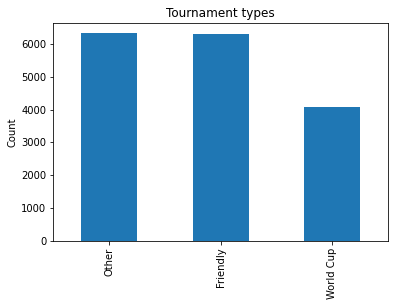

In [ ]:
#plotting tournament types counts
df_home_away['tournament_types'].value_counts().plot.bar()
plt.title('Tournament types')
plt.ylabel('Count')
plt.show()

Most matches were friendly or other types other than World Cup matches

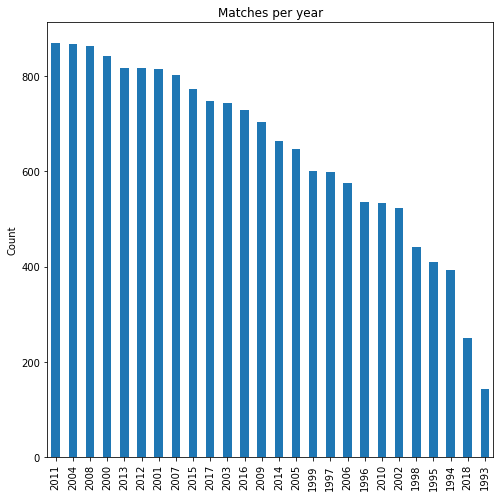

In [ ]:
#plotting matches per year
df_home_away['date'].dt.year.value_counts().plot.bar()
plt.title('Matches per year')
plt.ylabel('Count')
plt.gcf().set_size_inches(8,8)
plt.show()

2011 had the most matches

In [ ]:
#descrptive statistics home score
df_home_away['home_score'].describe()

count    16704.000000
mean         1.608896
std          1.619086
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         31.000000
Name: home_score, dtype: float64

* The mean home score is approximately 1.
* The standard deviation is approximately 1
* The minimum home score - 0.
* The first quartile is 0 scores
* The median is 1 score
* The third quartile is 2 scores
* The maximum number of homescores is 31

Text(0, 0.5, 'Frequency')

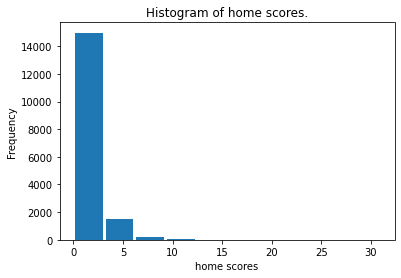

In [ ]:
#plotting histogram of home scores
df_home_away['home_score'].hist(grid=False, bins= 10, rwidth=0.9)

plt.title('Histogram of home scores.')
plt.xlabel('home scores')
plt.ylabel('Frequency')

In [ ]:
bin_width = (df_home_away['home_score'].max() - df_home_away['home_score'].min())/10
lower_lim = int(df_home_away['home_score'].min())
upper_lim = int(df_home_away['home_score'].min() +bin_width*1)
print(f'Most home team scores ranged between {lower_lim} to {upper_lim}')

Most home team scores ranged between 0 to 3


In [ ]:
#describing away scores
df_home_away['away_score'].describe()

count    16704.000000
mean         1.068307
std          1.247666
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         15.000000
Name: away_score, dtype: float64

* The mean away score is approximately 1.
* The standard deviation is approximately 1
* The minimum away score - 0.
* The first quartile is 0 scores
* The median is 1 score
* The third quartile is 2 scores
* The maximum away score is 15

Text(0, 0.5, 'Frequency')

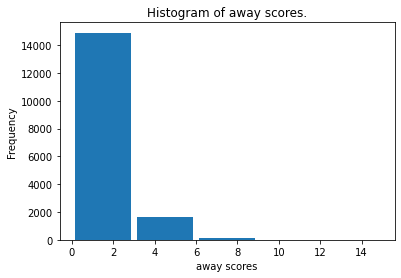

In [ ]:
#plotting histogram of away scores
df_home_away['away_score'].hist(grid=False, bins= 5, rwidth=0.9)

plt.title('Histogram of away scores.')
plt.xlabel('away scores')
plt.ylabel('Frequency')

In [ ]:
bin_width = (df_home_away['away_score'].max() - df_home_away['away_score'].min())/5
lower_lim = int(df_home_away['away_score'].min())
upper_lim = int(df_home_away['away_score'].min() +bin_width*1)
print(f'Most away team scores ranged between {lower_lim} to {upper_lim}')

Most away team scores ranged between 0 to 3


### Bivariate Analysis

In [ ]:
df_home_away.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'year_month_home', 'home_rank', 'year_month_away',
       'away_rank', 'tournament_types'],
      dtype='object')

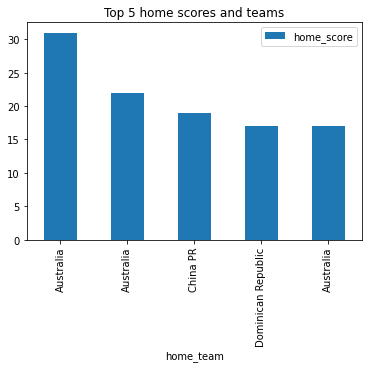

In [ ]:
#top 5 home scores by team
top_5_home_scores = df_home_away.sort_values(by='home_score', ascending=False).head(5)
top_5_home_scores.plot.bar(x='home_team', y='home_score')
plt.title('Top 5 home scores and teams')
plt.show()

Australia recorded the highest number of home scores

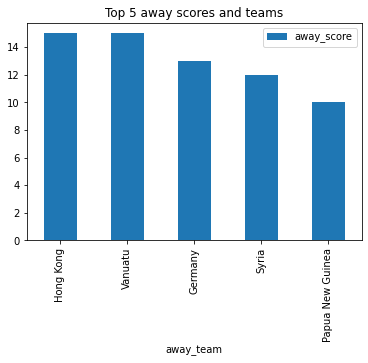

In [ ]:
#top 5 away scores by team
top_5_away_scores = df_home_away.sort_values(by='away_score', ascending=False).head(5)
top_5_away_scores.plot.bar(x='away_team', y='away_score')
plt.title('Top 5 away scores and teams')
plt.show()

Hong Kong and Vanuatu recorded the highest numbers of away scores

In [ ]:
#tournament types will be used in modeling, so encoding it to numerical representation
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df_home_away['tournament_types'] = enc.fit_transform(df_home_away['tournament_types'])

In [ ]:
df_home_away.dtypes

date                datetime64[ns]
home_team                   object
away_team                   object
home_score                   int64
away_score                   int64
tournament                  object
year_month_home             object
home_rank                  float64
year_month_away             object
away_rank                  float64
tournament_types             int64
dtype: object

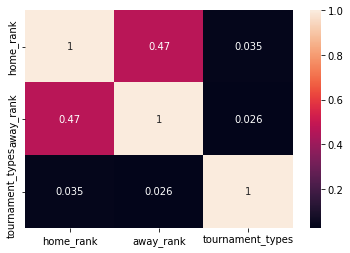

In [ ]:
#looking at the bivariate correlations of the 3 predictor variables to be used in analysis
sb.heatmap(df_home_away[['home_rank', 'away_rank', 'tournament_types']].corr(),annot=True)
# plt.gcf().set_size_inches(12,6)
plt.show()

Home rank and away rank are moderately correlated. The remaining combinations show very weak correlation.

## Implementing the Solution

### Multivariate Analysis and Modelling

In [ ]:
# Implementing the Solution
# 

In [ ]:
df_home_away.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'year_month_home', 'home_rank', 'year_month_away',
       'away_rank', 'tournament_types'],
      dtype='object')

In [ ]:
df_home_away.dtypes

date                datetime64[ns]
home_team                   object
away_team                   object
home_score                   int64
away_score                   int64
tournament                  object
year_month_home             object
home_rank                  float64
year_month_away             object
away_rank                  float64
tournament_types             int64
dtype: object

#### Polynomial regression

##### Predict how many goals the home team scores.

In [ ]:
df_home_away['home_score'].describe()

count    16704.000000
mean         1.608896
std          1.619086
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         31.000000
Name: home_score, dtype: float64

In [ ]:
#correlation matrix of predictors to use in multicollinearity VIF check
correlations = df_home_away[['home_rank', 'away_rank', 'tournament_types']].corr()

correlations

,home_rank,away_rank,tournament_types
home_rank,1.000000,0.468256,0.034596
away_rank,0.468256,1.000000,0.025961
tournament_types,0.034596,0.025961,1.000000


In [ ]:
#checking for multicollinearity
# creating a new dataframe with the inverse of the matrix above to interprete VIF from diagonal
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_rank,away_rank,tournament_types
home_rank,1.281669,-0.599402,-0.028779
away_rank,-0.599402,1.280999,-0.012519
tournament_types,-0.028779,-0.012519,1.001321


The VIF (variance inflation factor) score for each variable is found alongside the downwards sloping diagonal. Home rank has a score of 1.282, away_rank has a score of 1.281, tournament types a score of 1.001. VIF score of 5 and above is of concern. All the VIFs are below 5 so there is no high degree of multicollinearity present and all the 3 features can be used.

In [ ]:
#creating polynomial regressions of different degrees
degrees = [2, 3, 4, 5, 6]
for x in degrees:  
  X = df_home_away[['home_rank', 'away_rank', 'tournament_types']].values
  y = df_home_away['home_score'].values
  #instance of polynomialfeatures
  poly_reg = PolynomialFeatures(degree = x, include_bias=False) 

  #creating new features
  X_poly = poly_reg.fit_transform(X)
  #splitting to train and test
  X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

  #instance of linear regression
  pol_reg_model = LinearRegression()
  pol_reg_model.fit(X_train, y_train)

  #predicted
  pol_reg_predicted = pol_reg_model.predict(X_test)

  predicted_int = []

  for y in pol_reg_predicted:
    predicted_int.append(int(y)) 

  #rmse
  from sklearn import metrics
  pol_reg_rmse = np.sqrt(metrics.mean_squared_error(y_test, predicted_int))
  # rmses.append(f'Degrees: {x}, RMSE: {pol_reg_rmse}')
  print(f'Degrees: {x}, RMSE: {pol_reg_rmse}')

Degrees: 2, RMSE: 1.5169401612649147
Degrees: 3, RMSE: 1.5063469432501564
Degrees: 4, RMSE: 1.5076379419551458
Degrees: 5, RMSE: 1.513977577561067
Degrees: 6, RMSE: 1.5155583428860169


Using a model with 3 degrees compared to other degrees in the range 2-6 produces the lowest RMSE(root mean squared error) at 1.506. The RMSE is relatively high so the model is not as accurate but can make a number of decent predictions.

In [ ]:
# dictn = {
#     'actual': y_test,
#     'predicted': predicted_int
# }
# pd.DataFrame.from_dict(dictn).head()

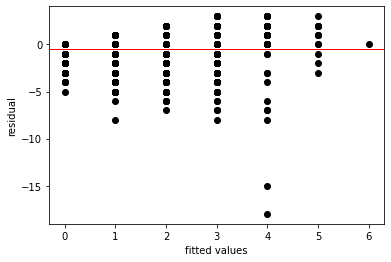

In [ ]:
#assessing the heteroscedasticity
#using the model with 3 degrees of polynomial as it had lowest RMSE.

X = df_home_away[['home_rank', 'away_rank', 'tournament_types']].values
y = df_home_away['home_score'].values
#instance of polynomialfeatures
poly_reg = PolynomialFeatures(degree = 3, include_bias=False) 

#creating new features
X_poly = poly_reg.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

#instance of linear regression
pol_reg_model = LinearRegression()
pol_reg_model.fit(X_train, y_train)

# The prediction for based on the model
pol_reg_predicted = pol_reg_model.predict(X_test)

predicted_int = []

for y in pol_reg_predicted:
  predicted_int.append(int(y)) 

# Creating the residual by substracting the test value from the predicted 
# value for each row in the test dataset

residuals = np.subtract(predicted_int, y_test)

import matplotlib.pyplot as plt

plt.scatter(predicted_int, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

residuals are centered around a mean that is close to 0, with some outliers

In [ ]:
#assessing heteroscedasticity using Barlett's test
import scipy as sp

test_result, p_value = sp.stats.bartlett(predicted_int, residuals)


# If the pvalue is less than the significance level of 0.05, then the null
# hypothesis is rejected - the variance is different for at least one pair of datapoints

# Otherwise the null hypothesis that 
# the variance is homogeneous across the data

#using significance level of 0.05:
if (p_value < 0.05 ):
  print('the variance is different for at least one pair of datapoints')
else:
  print('the variances are homogeneous across the data')


the variance is different for at least one pair of datapoints


###### Challenging the solution

In [ ]:
#challenging the solution with k-fold cross validation to see if model with lower RMSE can
# be obtained. Had selected model with polynomial degree of 3, whose RMSE was 1.506.

folds = KFold(n_splits=10)


print(str(folds.get_n_splits(X)) + ' folds are being used')

# create and assess 10 models based on the folds .
RMSES = [] # to keep track of the RSME of each model
count = 1  #count of training model

for train_index, test_index in folds.split(X):
    print('\nTraining model ' + str(count))
    X = df_home_away[['home_rank', 'away_rank', 'tournament_types']].values
    y = df_home_away['home_score'].values
    #instance of polynomialfeatures
    
    poly_reg = PolynomialFeatures(degree = 3, include_bias=False) 

    #creating new features
    X_poly = poly_reg.fit_transform(X)

    # set up the train and test based on the split determined by KFold
    X_train, X_test = X_poly[train_index], X_poly[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #instance of linear regression
    pol_reg_model = LinearRegression()
    pol_reg_model.fit(X_train, y_train)

    #predicting
    pol_reg_predicted = pol_reg_model.predict(X_test)

    predicted_int = []

    for y in pol_reg_predicted:
      predicted_int.append(int(y)) 

    #rmse/evaluating
    from sklearn import metrics
    pol_reg_rmse = np.sqrt(metrics.mean_squared_error(y_test, predicted_int))
    RMSES.append(pol_reg_rmse)
    print(f'RMSE: {pol_reg_rmse}')
    count+=1


print(f'\nMinimum RMSE: {np.min(RMSES)}')

10 folds are being used

Training model 1
RMSE: 1.4836027767842264

Training model 2
RMSE: 1.7275533146092696

Training model 3
RMSE: 1.8227894394346984

Training model 4
RMSE: 1.5273293322947255

Training model 5
RMSE: 1.4306315342625253

Training model 6
RMSE: 1.4680224182073247

Training model 7
RMSE: 1.4518210740782505

Training model 8
RMSE: 1.412942739685067

Training model 9
RMSE: 1.3842570804119654

Training model 10
RMSE: 1.4418883161214895

Minimum RMSE: 1.3842570804119654


Using 10-fold cross validation a model with an RMSE of 1.384 (model 9) was obtained, which is lower than the RMSE with a single train-test-split method (1.506). A better model was therefor identified using k-fold cross validation.

##### Predict how many goals the away team scores.

In [ ]:
df_home_away['away_score'].describe()

count    16704.000000
mean         1.068307
std          1.247666
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         15.000000
Name: away_score, dtype: float64

In [ ]:
#correlation matrix to be used for multicollinearity VIF check
correlations = df_home_away[['home_rank', 'away_rank', 'tournament_types']].corr()
correlations

,home_rank,away_rank,tournament_types
home_rank,1.000000,0.468256,0.034596
away_rank,0.468256,1.000000,0.025961
tournament_types,0.034596,0.025961,1.000000


In [ ]:
#checking for multicollinearity
# creating a new dataframe with the inverse of the matrix above to interprete VIF from diagonal
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_rank,away_rank,tournament_types
home_rank,1.281669,-0.599402,-0.028779
away_rank,-0.599402,1.280999,-0.012519
tournament_types,-0.028779,-0.012519,1.001321


The VIF (variance inflation factor) score for each variable is found alongside the downwards sloping diagonal. Home rank has a score of 1.282, away_rank has a score of 1.281, tournament types a score of 1.001. VIF score of 5 and above is of concern. All the VIFs are below 5 so there is no high degree of multicollinearity present and all the 3 features can be used.

In [ ]:
#creating polynomial regressions of different degrees
degrees = [2, 3, 4, 5, 6]
for x in degrees:  
  X = df_home_away[['home_rank', 'away_rank', 'tournament_types']].values
  y = df_home_away['away_score'].values
  #instance of polynomialfeatures
  poly_reg = PolynomialFeatures(degree = x, include_bias=False) 

  #creating new features
  X_poly = poly_reg.fit_transform(X)
  #splitting to train and test
  X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

  #instance of linear regression
  pol_reg_model = LinearRegression()
  pol_reg_model.fit(X_train, y_train)

  #predicted
  pol_reg_predicted = pol_reg_model.predict(X_test)

  predicted_int = []

  for y in pol_reg_predicted:
    predicted_int.append(int(y)) 

  #rmse
  from sklearn import metrics
  pol_reg_rmse = np.sqrt(metrics.mean_squared_error(y_test, predicted_int))
  # rmses.append(f'Degrees: {x}, RMSE: {pol_reg_rmse}')
  print(f'Degrees: {x}, RMSE: {pol_reg_rmse}')

Degrees: 2, RMSE: 1.2469657876406408
Degrees: 3, RMSE: 1.2461253927525655
Degrees: 4, RMSE: 1.2487647293612267
Degrees: 5, RMSE: 1.2460052900687772
Degrees: 6, RMSE: 1.247685675579548


In [ ]:
#some comparisons of actual vs predicted away scores with 5 degree polynomial (lowest RMSE)

X = df_home_away[['home_rank', 'away_rank', 'tournament_types']].values
y = df_home_away['away_score'].values
#instance of polynomialfeatures
poly_reg = PolynomialFeatures(degree = 5, include_bias=False) 

#creating new features
X_poly = poly_reg.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

#instance of linear regression
pol_reg_model = LinearRegression()
pol_reg_model.fit(X_train, y_train)

# The prediction for based on the model
pol_reg_predicted = pol_reg_model.predict(X_test)

predicted_int = []

for y in pol_reg_predicted:
  predicted_int.append(int(y)) 

dictn = {
    'actual': y_test,
    'predicted': predicted_int
}
pd.DataFrame.from_dict(dictn).head()

,actual,predicted
0,1,0
1,2,1
2,0,0
3,0,0
4,1,1


Using a model with 5 degrees compared to other degrees in the range 2-6 produces the lowest RMSE(root mean squared error) at 1.2460. The RMSE is relatively high so the model is not as accurate but can make a number of decent predictions.

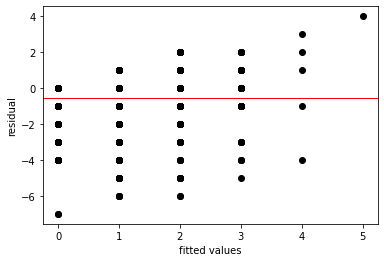

In [ ]:
#assessing the heteroscedasticity
#using the model with 5 degrees of polynomial as it had lowest RMSE.

X = df_home_away[['home_rank', 'away_rank', 'tournament_types']].values
y = df_home_away['away_score'].values
#instance of polynomialfeatures
poly_reg = PolynomialFeatures(degree = 5, include_bias=False) 

#creating new features
X_poly = poly_reg.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

#instance of linear regression
pol_reg_model = LinearRegression()
pol_reg_model.fit(X_train, y_train)

# The prediction for based on the model
pol_reg_predicted = pol_reg_model.predict(X_test)

predicted_int = []

for y in pol_reg_predicted:
  predicted_int.append(int(y)) 

# Creating the residual by substracting the test value from the predicted 
# value for each row in the test dataset

residuals = np.subtract(predicted_int, y_test)

import matplotlib.pyplot as plt

plt.scatter(predicted_int, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

residuals are centered around a mean that is close to 0, with some outliers

In [ ]:
#assessing heteroscedasticity using Barlett's test
import scipy as sp

test_result, p_value = sp.stats.bartlett(predicted_int, residuals)


# If the pvalue is less than the significance level of 0.05, then the null
# hypothesis is rejected - the variance is different for at least one pair of datapoints

# Otherwise the null hypothesis that 
# the variance is homogeneous across the data

#using significance level of 0.05:
if (p_value < 0.05 ):
  print('the variance is different for at least one pair of datapoints')
else:
  print('the variances are homogeneous across the data')


the variance is different for at least one pair of datapoints


###### Challenging the solution

In [ ]:
#challenging the solution with k-fold cross validation to see if model with lower RMSE can
# be obtained. Had selected model with polynomial degree of 5, whose RMSE was 1.2460.

folds = KFold(n_splits=10)


print(str(folds.get_n_splits(X)) + ' folds are being used')

# create and assess 10 models based on the folds .
RMSES = [] # to keep track of the RSME of each model
count = 1  #training model count

for train_index, test_index in folds.split(X):
    print('\nTraining model ' + str(count))
    X = df_home_away[['home_rank', 'away_rank', 'tournament_types']].values
    y = df_home_away['away_score'].values
    #instance of polynomialfeatures
    
    poly_reg = PolynomialFeatures(degree = 5, include_bias=False) 

    #creating new features
    X_poly = poly_reg.fit_transform(X)

    # set up the train and test based on the split determined by KFold
    X_train, X_test = X_poly[train_index], X_poly[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #instance of linear regression
    pol_reg_model = LinearRegression()
    pol_reg_model.fit(X_train, y_train)

    #predicted
    pol_reg_predicted = pol_reg_model.predict(X_test)

    predicted_int = []

    for y in pol_reg_predicted:
      predicted_int.append(int(y)) 

    #rmse
    from sklearn import metrics
    pol_reg_rmse = np.sqrt(metrics.mean_squared_error(y_test, predicted_int))
    RMSES.append(pol_reg_rmse)
    print(f'RMSE: {pol_reg_rmse}')
    count+=1


print(f'\nMinimum RMSE: {np.min(RMSES)}')

10 folds are being used

Training model 1
RMSE: 1.292384358826567

Training model 2
RMSE: 1.2793531429564626

Training model 3
RMSE: 1.3392299295896868

Training model 4
RMSE: 1.2732576012771546

Training model 5
RMSE: 1.3170916972337787

Training model 6
RMSE: 1.3081961800544222

Training model 7
RMSE: 1.240050221119372

Training model 8
RMSE: 1.288363395754846

Training model 9
RMSE: 1.234727054131233

Training model 10
RMSE: 1.2320568460327987

Minimum RMSE: 1.2320568460327987


Using 10-fold cross validation a model with an RMSE of 1.2321 (model 10) was obtained, which is lower than the RMSE with initial train-test-split method (1.2460). A better model was therefor identified using k-fold cross validation.

#### Logistic regression

##### Figure out from the home team’s perspective if the game is a Win, Lose or Draw

In [ ]:
df_home_away.head(2)

,date,home_team,away_team,home_score,away_score,tournament,year_month_home,home_rank,year_month_away,away_rank,tournament_types
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia 1993-8,59.0,Uruguay 1993-8,22.0,2
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil 1993-8,8.0,Mexico 1993-8,14.0,0


In [ ]:
#creating function that will input correct values in home status column
#based on home and away scores 
def status(x):
  if x['home_score'] > x['away_score']:
    return 'win'
  elif x['home_score'] == x['away_score']:
    return 'draw'
  elif x['home_score'] < x['away_score']:
    return 'lose'

In [ ]:
#creating home team status column - target column
df_home_away['home_status'] = df_home_away.apply(lambda x: status(x), axis=1)

In [ ]:
df_home_away.head(3)

,date,home_team,away_team,home_score,away_score,tournament,year_month_home,home_rank,year_month_away,away_rank,tournament_types,home_status
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia 1993-8,59.0,Uruguay 1993-8,22.0,2,win
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil 1993-8,8.0,Mexico 1993-8,14.0,0,draw
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Ecuador 1993-8,35.0,Venezuela 1993-8,94.0,2,win


The multicollinearity of the 3 predictor variables being used was assesed in polynomial regression, where it was observed that for variance inflation factors, home rank has a score of 1.282, away_rank has a score of 1.281, tournament types a score of 1.001. VIF score of 5 and above is of concern. All the VIFs are below 5 so there is no high degree of multicollinearity present and all the 3 features can be used in modelling.

In [ ]:
#using home rank, away rank and tournament types to predict if 
#game is a win lose or draw for the home team

#separating features and target
X = df_home_away[['home_rank', 'away_rank', 'tournament_types']]
y = df_home_away['home_status']

# Splitting our dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)


from sklearn.linear_model import LogisticRegression
#fitting logistic regression model
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

#predicting class
y_pred = LogReg.predict(X_test)


#testing accuracy of model
print('\nAccuracy: ' + str(metrics.accuracy_score(y_test, y_pred)))


Accuracy: 0.5809637832984137


The model predicted whether the home team won, lost or had a draw with 58.1% accuracy.

In [ ]:
#previewing some predictions vs actual
dictn = {
    'actual': y_test,
    'predicted': y_pred
}
pd.DataFrame.from_dict(dictn).head(5)

,actual,predicted
21751,win,win
16104,win,win
5677,draw,win
1877,win,win
18242,draw,lose


###### Challenging the solution

In [ ]:
#challenging the solution with k-fold cross validation to see if model with higher accuracy can
# be obtained. current model - 58% accuracy.
folds = KFold(n_splits=10)


print(str(folds.get_n_splits(X)) + ' folds are being used')

accuracies = [] # To keep track of the RSME of each model
count = 1 # To keep count of models 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  
  #fitting logistic regression model
  LogReg = LogisticRegression()
  LogReg.fit(X_train, y_train)

  #predicting class
  y_pred = LogReg.predict(X_test)

  #testing accuracy of model
  print('Accuracy: ' + str(metrics.accuracy_score(y_test, y_pred)))
  count += 1
  accuracies.append(metrics.accuracy_score(y_test, y_pred))

print(f'\nMax accuracy: {np.max(accuracies)}')


10 folds are being used

Training model 1
Accuracy: 0.5972471573907839

Training model 2
Accuracy: 0.5727109515260324

Training model 3
Accuracy: 0.5792938360263316

Training model 4
Accuracy: 0.5786953919808497

Training model 5
Accuracy: 0.5820359281437125

Training model 6
Accuracy: 0.5802395209580838

Training model 7
Accuracy: 0.588622754491018

Training model 8
Accuracy: 0.5616766467065868

Training model 9
Accuracy: 0.5730538922155689

Training model 10
Accuracy: 0.5622754491017964

Max accuracy: 0.5972471573907839


A model with higher accuracy was than 58.1% was identified - model 1 at 59.7% accuracy.

## Conclusions

The datasets were loaded, cleaned and merged (to add ranking information to the dataset with the score information).

Univariate and bivariate analysis was carried out, providing further insights on the target and predictor variables, some of which include:
* Most matches were friendly or other types other than World Cup matches.
* 2011 was the year with the most matches.
* Most home and away team scores ranged between 0 to 3.
* The highest value of home scores was by team Australia.
* The highest values of away scores were by teams Hong Kong and Vanuatu. etc

**Modelling**

**1. Polynomial regression** 

For home team scores model:
* Testing degrees of the polynomial to be used in a range of 2 to 6, 3 produced the lowest RMSE(root mean squared error) at 1.506. This model (using 3rd degree polynomial) was challenged using 10-fold cross validation and a model with a lower RMSE (1.384) was identified.

For away team scores model:
* Testing degrees of the polynomial to be used in a range of 2 to 6, 5 produced the lowest RMSE(root mean squared error) at 1.2460. This model (using 5th degree polynomial) was challenged using 10-fold cross validation and a model with a lower RMSE (1.2321) was identified.

Looking at the RMSE values, it appears that the independent variables used (home team rank, away team rank, and tournament type) were slightly better at predicting away team scores than home team scores.

**2. Logistic regression**

To determine whether a game would be a win, lose or draw from the home team's perspective using home team rank, away team rank, and tournament type as inputs, a logistic regression model was used - classification problem.

Based on the 3 inputs above, the initial model had an accuracy of 58.1%. Upon 10-fold cross validation, a model with higher accuracy (59.7%) was identified.

The objectives of the study - developing models to predict football match results - were therefore achieved. However, the accuracy of the models could be improved even further by researching on and identifying other features (such as player rankings, team playing styles etc.) that may heavily influence the game outcome and including them in the models.  